In [1]:
using ReinforcementLearning, StableRNGs, Flux, Flux.Losses

function RL.Experiment(
    ::Val{:JuliaRL},
    ::Val{:BasicDQN},
    ::Val{:CartPole},
    ::Nothing;
    seed = 123
)
    rng = StableRNG(seed)
    env = CartPoleEnv(; T = Float32, rng = rng)
    ns, na = length(state(env)), length(action_space(env))

    policy = Agent(
        policy = QBasedPolicy(
            learner = BasicDQNLearner(
                approximator = NeuralNetworkApproximator(
                    model = Chain(
                        Dense(ns, 128, relu; init = glorot_uniform(rng)),
                        Dense(128, 128, relu; init = glorot_uniform(rng)),
                        Dense(128, na; init = glorot_uniform(rng)),
                    ) |> gpu,
                    optimizer = ADAM(),
                ),
                batch_size = 32,
                min_replay_history = 100,
                loss_func = huber_loss,
                rng = rng,
            ),
            explorer = EpsilonGreedyExplorer(
                kind = :exp,
                ϵ_stable = 0.01,
                decay_steps = 500,
                rng = rng,
            ),
        ),
        trajectory = CircularArraySARTTrajectory(
            capacity = 1000,
            state = Vector{Float32} => (ns,),
        ),
    )
    stop_condition = StopAfterStep(10_000, is_show_progress=!haskey(ENV, "CI"))
    hook = TotalRewardPerEpisode()
    Experiment(policy, env, stop_condition, hook, "# BasicDQN <-> CartPole")
end

# BasicDQN <-> CartPole


Progress: 100%|█████████████████████████████████████████| Time: 0:00:34


             ⠀⠀⠀⠀⠀⠀⠀⠀⠀Total reward per episode⠀⠀⠀⠀⠀⠀⠀⠀⠀ 
             ┌────────────────────────────────────────┐ 
         200 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡎⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠀⣾⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣰⡏⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣸⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡸⣿⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⡿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
   Score     │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⡇⠃⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⢰⢹⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡿⠖⠊⠘⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⠀⢀⠀⠀⠀⣇⡄⠀⠀⣀⢀⢠⡄⠀⡀⡇⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             │⢢⠜⡆⣄⡜⢸⠛⣶⣇⠟⡜⣼⠣⢤⢻⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
           0 │⠀⠀⠈⠀⠀⠈⠀⠈⠈⠀⠃⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
             └─────────────────

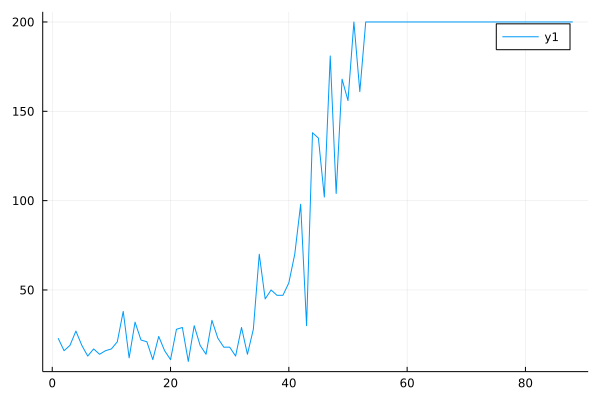

In [3]:
using Plots

ex = E`JuliaRL_BasicDQN_CartPole`
@time run(ex)
plot(ex.hook.rewards)

In [5]:
demo = Experiment(
    ex.policy,
    CartPoleEnv(),
    StopWhenDone(),
    RolloutHook(plot, closeall),
    "DQN <-> Demo"
)
run(demo)

DQN <-> Demo


DQN <-> Demo


typename(Experiment)
├─ policy => typename(Agent)
│  ├─ policy => typename(QBasedPolicy)
│  │  ├─ learner => typename(BasicDQNLearner)
│  │  │  ├─ approximator => typename(NeuralNetworkApproximator)
│  │  │  │  ├─ model => typename(Chain)
│  │  │  │  │  └─ layers
│  │  │  │  │     ├─ 1
│  │  │  │  │     │  └─ typename(Dense)
│  │  │  │  │     │     ├─ weight => 128×4 CUDA.CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}
│  │  │  │  │     │     ├─ bias => 128-element CUDA.CuArray{Float32, 1, CUDA.Mem.DeviceBuffer}
│  │  │  │  │     │     └─ σ => typename(typeof(relu))
│  │  │  │  │     ├─ 2
│  │  │  │  │     │  └─ typename(Dense)
│  │  │  │  │     │     ├─ weight => 128×128 CUDA.CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}
│  │  │  │  │     │     ├─ bias => 128-element CUDA.CuArray{Float32, 1, CUDA.Mem.DeviceBuffer}
│  │  │  │  │     │     └─ σ => typename(typeof(relu))
│  │  │  │  │     └─ 3
│  │  │  │  │        └─ typename(Dense)
│  │  │  │  │           ├─ weight => 2×128 CUDA.CuArray{Float32